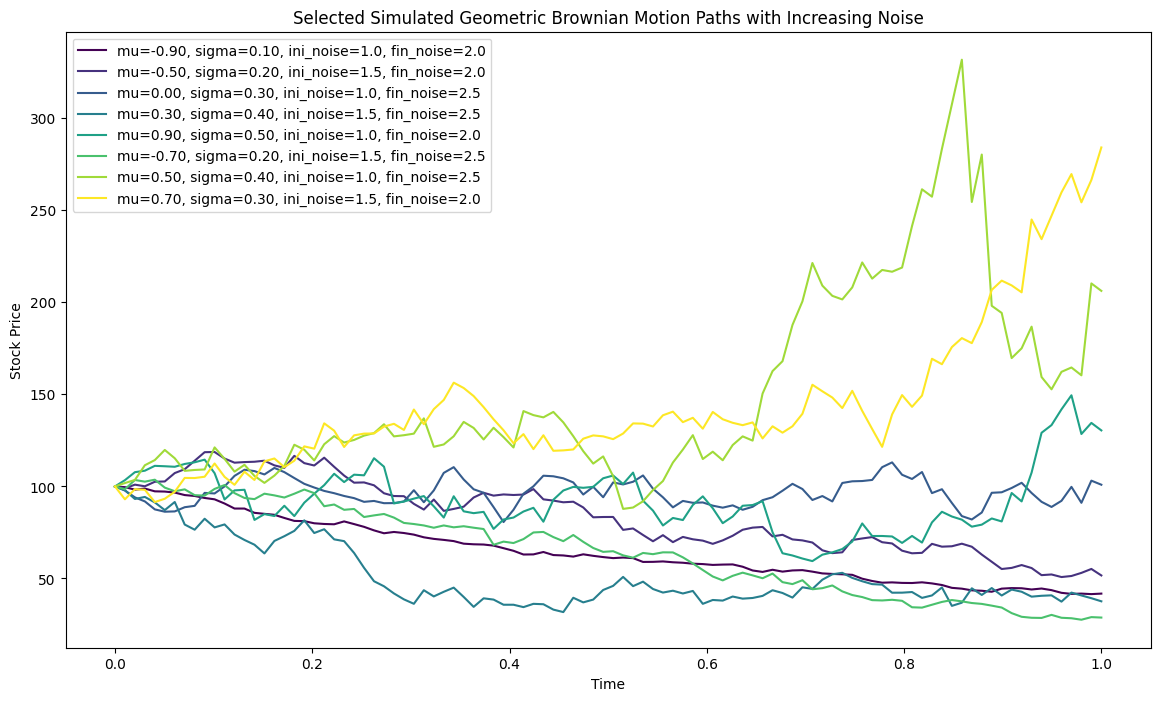

In [35]:
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import product

def simulate_gbm_with_increasing_noise(S0, mu, sigma, T, dt, n_paths, initial_noise_factors, final_noise_factors, seed=None):
    """
    Simulate multiple paths of Geometric Brownian Motion with increasing noise.

    Parameters:
    S0 (float): Initial stock price
    mu (list): List of drift rates
    sigma (list): List of volatility rates
    T (float): Total time (in years)
    dt (float): Time step
    n_paths (int): Number of paths to simulate
    initial_noise_factors (list): List of initial noise factors
    final_noise_factors (list): List of final noise factors
    seed (int, optional): Random seed for reproducibility

    Returns:
    tuple: (time_grid, paths) where time_grid is a numpy array and paths is a dictionary of simulated paths for each (mu, sigma, initial_noise_factor, final_noise_factor) pair
    """
    if seed is not None:
        np.random.seed(seed)

    n_steps = int(T / dt)
    time_grid = np.linspace(0, T, n_steps)
    paths = {}

    for (m, s, ini_noise, fin_noise) in product(mu, sigma, initial_noise_factors, final_noise_factors):
        S = np.zeros((n_steps, n_paths))
        S[0] = S0

        for t in range(1, n_steps):
            Z = np.random.standard_normal(n_paths)
            # Linearly interpolate the noise factor over time
            current_noise_factor = ini_noise + (fin_noise - ini_noise) * (t / n_steps)
            S[t] = S[t-1] * np.exp((m - 0.5 * s**2) * dt + s * np.sqrt(dt) * Z * current_noise_factor)

        paths[(m, s, ini_noise, fin_noise)] = S

    return time_grid, paths

def save_simulated_data(time_grid, paths, filename):
    """
    Save the simulated paths to a CSV file.

    Parameters:
    time_grid (array): Array of time points
    paths (dict): Dictionary of simulated paths for each (mu, sigma, initial_noise_factor, final_noise_factor) pair
    filename (str): Name of the CSV file to save the data
    """
    data = []
    for key, value in paths.items():
        for i in range(value.shape[1]):
            path_data = {'mu': key[0], 'sigma': key[1], 'initial_noise_factor': key[2], 'final_noise_factor': key[3], 'path': i}
            path_data.update({f't_{t}': value[t, i] for t in range(len(time_grid))})
            data.append(path_data)

    df = pd.DataFrame(data)
    df.to_csv(filename, index=False)

def plot_selected_paths(time_grid, paths, selected_pairs):
    """
    Plot selected paths from the simulated data.

    Parameters:
    time_grid (array): Array of time points
    paths (dict): Dictionary of simulated paths for each (mu, sigma, initial_noise_factor, final_noise_factor) pair
    selected_pairs (list): List of selected pairs (tuples) to plot
    """
    plt.figure(figsize=(14, 8))
    colors = plt.cm.viridis(np.linspace(0, 1, len(selected_pairs)))

    for color_idx, key in enumerate(selected_pairs):
        value = paths[key]
        plt.plot(time_grid, value[:, 0], color=colors[color_idx], label=f'mu={key[0]:.2f}, sigma={key[1]:.2f}, ini_noise={key[2]:.1f}, fin_noise={key[3]:.1f}')

    plt.title('Selected Simulated Geometric Brownian Motion Paths with Increasing Noise')
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

# Parameters
S0 = 100  # Initial stock price
mu = np.round(np.linspace(-0.9, 0.9, 19), 2)  # Different drift rates generated using linspace and rounded
sigma = np.round(np.linspace(0.1, 0.5, 5), 2)  # Different volatility rates generated using linspace and rounded
initial_noise_factors = [1.0, 1.5]  # Different initial noise factors
final_noise_factors = [2.0, 2.5]  # Different final noise factors
T = 1.0  # Total time (1 year)
dt = 0.01  # Time step
n_paths = 10  # Number of paths to simulate
seed = 42  # Random seed for reproducibility

# Simulate GBM with increasing noise
time_grid, paths = simulate_gbm_with_increasing_noise(S0, mu, sigma, T, dt, n_paths, initial_noise_factors, final_noise_factors, seed)

# Save the simulated data
filename = 'simulated_gbm_paths_with_increasing_noise.csv'
save_simulated_data(time_grid, paths, filename)

# Manually select pairs to plot (example)
selected_pairs = [
    (-0.9, 0.1, 1.0, 2.0),
    (-0.5, 0.2, 1.5, 2.0),
    (0.0, 0.3, 1.0, 2.5),
    (0.3, 0.4, 1.5, 2.5),
    (0.9, 0.5, 1.0, 2.0),
    (-0.7, 0.2, 1.5, 2.5),
    (0.5, 0.4, 1.0, 2.5),
    (0.7, 0.3, 1.5, 2.0)
]

# Plot the selected paths
plot_selected_paths(time_grid, paths, selected_pairs)
'''

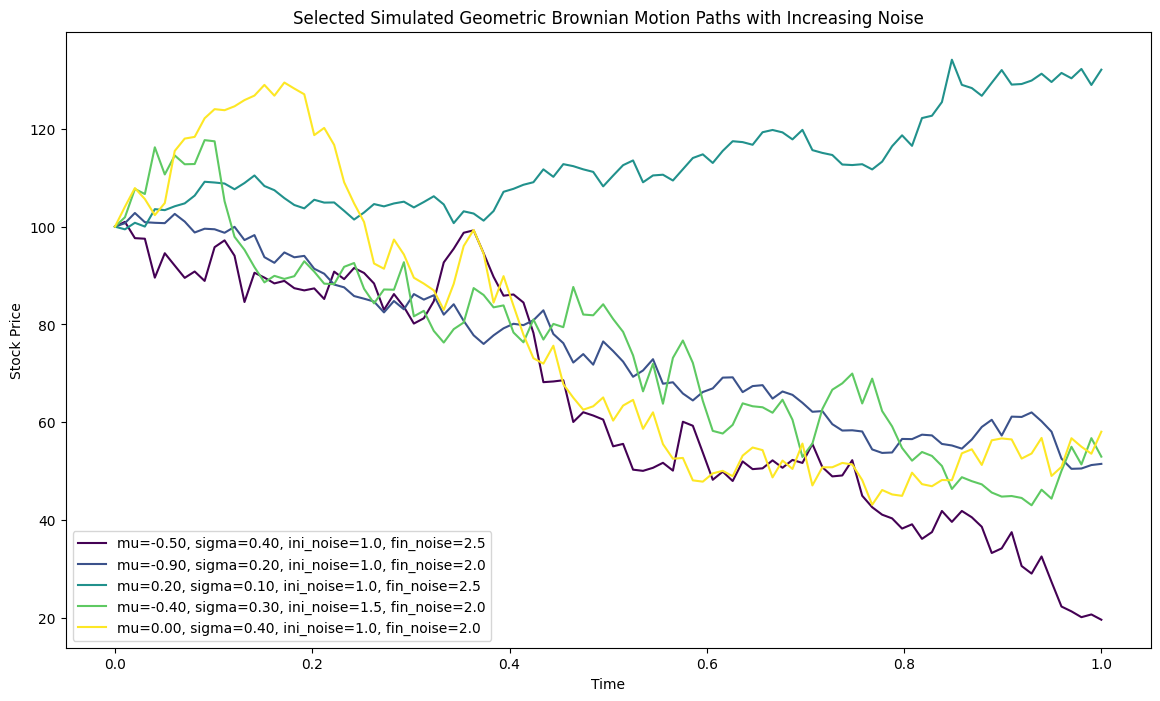

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import product
import random

def simulate_gbm_with_increasing_noise(S0, mu, sigma, T, dt, n_paths, initial_noise_factors, final_noise_factors, all_combinations=True, sample_size=10, seed=None):
    """
    Simulate multiple paths of Geometric Brownian Motion with increasing noise.

    Parameters:
    S0 (float): Initial stock price
    mu (list): List of drift rates
    sigma (list): List of volatility rates
    T (float): Total time (in years)
    dt (float): Time step
    n_paths (int): Number of paths to simulate
    initial_noise_factors (list): List of initial noise factors
    final_noise_factors (list): List of final noise factors
    all_combinations (bool): If True, simulate all possible combinations. If False, use sample_size to sample combinations.
    sample_size (int): Number of random combinations to sample if all_combinations is False
    seed (int, optional): Random seed for reproducibility

    Returns:
    tuple: (time_grid, paths, selected_combinations) where time_grid is a numpy array and paths is a dictionary of simulated paths for each (mu, sigma, initial_noise_factor, final_noise_factor) pair, and selected_combinations is the list of combinations used for simulation
    """
    if seed is not None:
        np.random.seed(seed)

    n_steps = int(T / dt)
    time_grid = np.linspace(0, T, n_steps)
    paths = {}

    all_combinations_list = list(product(mu, sigma, initial_noise_factors, final_noise_factors))

    if all_combinations:
        selected_combinations = all_combinations_list
    else:
        selected_combinations = random.sample(all_combinations_list, sample_size)

    for (m, s, ini_noise, fin_noise) in selected_combinations:
        S = np.zeros((n_steps, n_paths))
        S[0] = S0

        for t in range(1, n_steps):
            Z = np.random.standard_normal(n_paths)
            # Linearly interpolate the noise factor over time
            current_noise_factor = ini_noise + (fin_noise - ini_noise) * (t / n_steps)
            S[t] = S[t-1] * np.exp((m - 0.5 * s**2) * dt + s * np.sqrt(dt) * Z * current_noise_factor)

        paths[(m, s, ini_noise, fin_noise)] = S

    return time_grid, paths, selected_combinations

def save_simulated_data(time_grid, paths, filename):
    """
    Save the simulated paths to a CSV file.

    Parameters:
    time_grid (array): Array of time points
    paths (dict): Dictionary of simulated paths for each (mu, sigma, initial_noise_factor, final_noise_factor) pair
    filename (str): Name of the CSV file to save the data
    """
    data = []
    for key, value in paths.items():
        for i in range(value.shape[1]):
            path_data = {'mu': key[0], 'sigma': key[1], 'initial_noise_factor': key[2], 'final_noise_factor': key[3], 'path': i}
            path_data.update({f't_{t}': value[t, i] for t in range(len(time_grid))})
            data.append(path_data)

    df = pd.DataFrame(data)
    df.to_csv(filename, index=False)

def plot_selected_paths(time_grid, paths, selected_pairs):
    """
    Plot selected paths from the simulated data.

    Parameters:
    time_grid (array): Array of time points
    paths (dict): Dictionary of simulated paths for each (mu, sigma, initial_noise_factor, final_noise_factor) pair
    selected_pairs (list): List of selected pairs (tuples) to plot
    """
    plt.figure(figsize=(14, 8))
    colors = plt.cm.viridis(np.linspace(0, 1, len(selected_pairs)))

    for color_idx, key in enumerate(selected_pairs):
        value = paths[key]
        plt.plot(time_grid, value[:, 0], color=colors[color_idx], label=f'mu={key[0]:.2f}, sigma={key[1]:.2f}, ini_noise={key[2]:.1f}, fin_noise={key[3]:.1f}')

    plt.title('Selected Simulated Geometric Brownian Motion Paths with Increasing Noise')
    plt.xlabel('Time')
    plt.ylabel('Stock Price')
    plt.legend()
    plt.show()

# Parameters
S0 = 100  # Initial stock price
mu = np.round(np.linspace(-0.9, 0.9, 19), 2)  # Different drift rates generated using linspace and rounded
sigma = np.round(np.linspace(0.1, 0.5, 5), 2)  # Different volatility rates generated using linspace and rounded
initial_noise_factors = [1.0, 1.5]  # Different initial noise factors
final_noise_factors = [2.0, 2.5]  # Different final noise factors
T = 1.0  # Total time (1 year)
dt = 0.01  # Time step
n_paths = 10  # Number of paths to simulate
seed = 42  # Random seed for reproducibility
sample_size = 100  # Number of random combinations to sample for simulation
plot_sample_size = 5  # Number of random combinations to sample for plotting

# Simulate GBM with increasing noise
time_grid, paths, selected_combinations = simulate_gbm_with_increasing_noise(S0, mu, sigma, T, dt, n_paths, initial_noise_factors, final_noise_factors, all_combinations=False, sample_size=sample_size, seed=seed)

# Save the simulated data
filename = 'simulated_gbm_paths_with_increasing_noise.csv'
save_simulated_data(time_grid, paths, filename)

# Sample combinations for plotting
selected_selected_combinations = random.sample(selected_combinations, plot_sample_size)

# Plot the selected paths
plot_selected_paths(time_grid, paths, selected_selected_combinations)
